In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import time
from sklearn import metrics
import numpy as np
import  matplotlib.pyplot as plt

# Data Path

In [2]:
DATAPATH = './dataset/Shill Bidding Dataset.csv'

# Data preprocessing

## Data preprocessing - Load data

In [3]:
data = pd.read_csv(DATAPATH)
data

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [4]:
label = data['Class']
label

0       0
1       0
2       0
3       0
4       0
       ..
6316    1
6317    0
6318    0
6319    0
6320    0
Name: Class, Length: 6321, dtype: int64

In [5]:
X = data.drop(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Class'], axis=1)
X.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7


# Purity Score

In [6]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

# K-mean Clustering

In [7]:
start_time = time.time()


#clustering
km = KMeans(n_clusters=2, init='k-means++')

km.fit(X)

end_time = time.time()

In [8]:
#Performance
print("Purity: %0.3f" % purity_score(label, km.labels_))
print("--- %s seconds ---" % (end_time - start_time))

Purity: 0.893
--- 0.06391263008117676 seconds ---


# Hierarchical Clustering

In [9]:
start_time = time.time()
hc = AgglomerativeClustering(n_clusters=2)
hc.fit(X)
end_time = time.time()

In [11]:
print("Purity: %0.3f" % purity_score(label, hc.labels_))
print("--- %s seconds ---" % (end_time - start_time))

Purity: 0.893
--- 1.4944725036621094 seconds ---


In [12]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)


In [15]:
hc_full = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hc_full.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

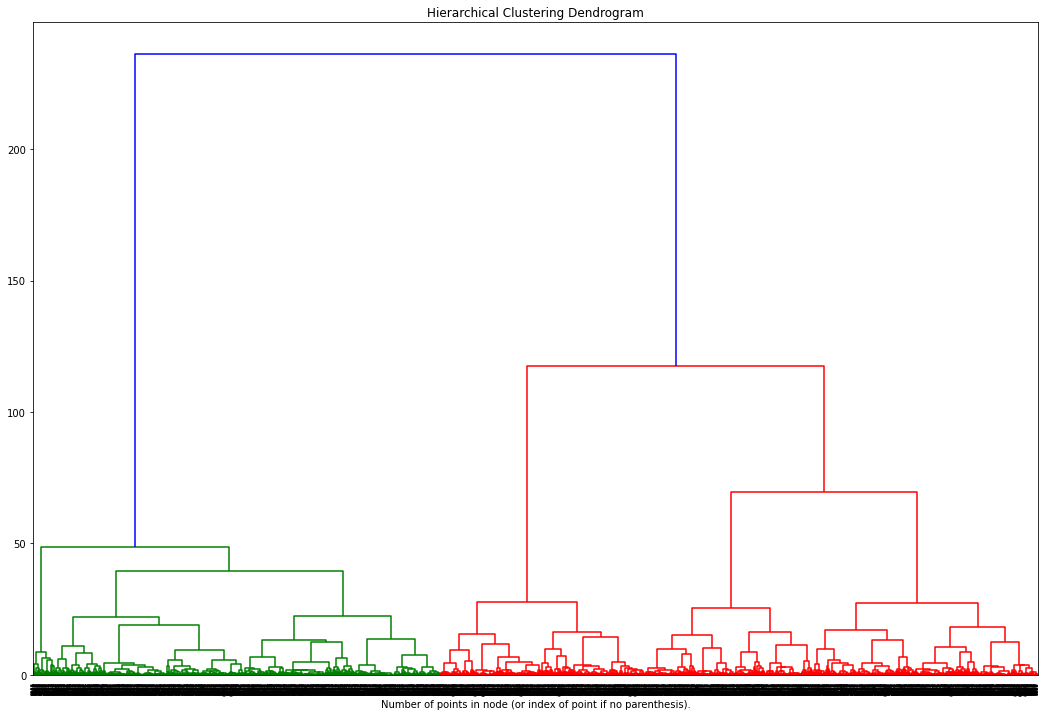

In [16]:
plt.figure(figsize=(18,12))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(hc_full, truncate_mode=None)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

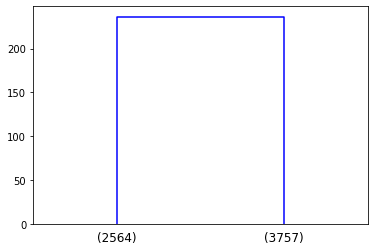

In [20]:
plot_dendrogram(hc_full,  truncate_mode='lastp', p=2)

# DBSCAN

In [17]:
import pandas as pd

res = []

for eps in np.arange(1,2,0.05):
    for min_samples in range(5,15):
        start_time = time.time()
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        dbscan.fit(X)
        end_time = time.time()
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats, 'purity':purity_score(label, dbscan.labels_), 'time': (end_time - start_time)})     
df = pd.DataFrame(res)

df

,eps,min_samples,n_clusters,outliners,stats,purity,time
0,1.00,5,5,0,[2427 1408 1289 1060 137],0.893213,0.615398
1,1.00,6,5,0,[2427 1408 1289 1060 137],0.893213,0.538424
2,1.00,7,5,0,[2427 1408 1289 1060 137],0.893213,0.541450
3,1.00,8,5,2,[2427 1408 1289 1060 135],0.893213,0.531460
4,1.00,9,5,2,[2427 1408 1289 1060 135],0.893213,0.534454
...,...,...,...,...,...,...,...
195,1.95,10,5,0,[2427 1408 1289 1060 137],0.893213,0.524466
196,1.95,11,5,0,[2427 1408 1289 1060 137],0.893213,0.522469
197,1.95,12,5,0,[2427 1408 1289 1060 137],0.893213,0.527490
198,1.95,13,5,0,[2427 1408 1289 1060 137],0.893213,0.537448
